<a href="https://colab.research.google.com/github/anishantony8/Deep-Learning/blob/main/Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
from IPython.display import HTML

In [ ]:
Batch_Size = 32
Epochs = 50
Channels = 3
Image_Size = 256

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
'PlantVillage',
seed=12,
shuffle=True,
image_size = (Image_Size,Image_Size),
batch_size = Batch_Size)

Found 2152 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
dataset.take(1)

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    

(32, 256, 256, 3)
[0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 2 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0]


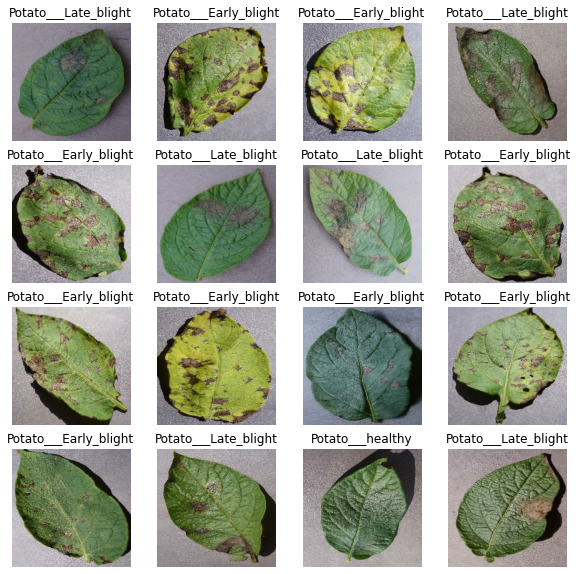

In [ ]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(16):
        ax = plt.subplot(4,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [ ]:
len(dataset) * .8

54.400000000000006

In [ ]:
train_ds = dataset.take(54)
len(train_ds)

54

In [ ]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [ ]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [ ]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [ ]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [ ]:
def get_dataset_partition(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    assert (train_split+val_split+val_split)==1
    ds_size = len(ds)
    if shuffle:
        ds.shuffle(shuffle_size,seed=12)
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds   
    

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partition(dataset)

In [ ]:
len(train_ds)

54

In [ ]:
len(val_ds)

6

In [ ]:
len(test_ds)

8

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential(
[
    layers.experimental.preprocessing.Resizing(Image_Size,Image_Size),
    layers.experimental.preprocessing.Rescaling(1./255),
])

In [ ]:
data_augmentation = tf.keras.Sequential(
[
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
train_ds = train_ds.map(
lambda x,y: (data_augmentation(x,training=True),y)).prefetch(buffer_size=tf.data.AUTOTUNE)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
input_shape = (Batch_Size,Image_Size,Image_Size,Channels)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,3,activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,3,activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,3,activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,3,activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,3,activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
])
model.build(input_shape=input_shape)

In [ ]:
model.compile(
optimizer='adam',loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [29]:
history = model.fit(
train_ds,
batch_size = Batch_Size,
validation_data=val_ds,
verbose=1,
epochs=50)

Epoch 1/50
54/54 [==============================] - 262s 5s/step - loss: 0.8786 - accuracy: 0.5301 - val_loss: 0.7999 - val_accuracy: 0.6771
Epoch 2/50
54/54 [==============================] - 253s 5s/step - loss: 0.5466 - accuracy: 0.7685 - val_loss: 0.3927 - val_accuracy: 0.8385
Epoch 3/50
54/54 [==============================] - 258s 5s/step - loss: 0.3525 - accuracy: 0.8588 - val_loss: 0.3763 - val_accuracy: 0.8333
Epoch 4/50
54/54 [==============================] - 251s 5s/step - loss: 0.2555 - accuracy: 0.8958 - val_loss: 0.2197 - val_accuracy: 0.9115
Epoch 5/50
54/54 [==============================] - 259s 5s/step - loss: 0.2554 - accuracy: 0.9022 - val_loss: 0.2241 - val_accuracy: 0.9062
Epoch 6/50
54/54 [==============================] - 250s 5s/step - loss: 0.2221 - accuracy: 0.9132 - val_loss: 0.1691 - val_accuracy: 0.9479
Epoch 7/50
54/54 [==============================] - 252s 5s/step - loss: 0.1719 - accuracy: 0.9294 - val_loss: 0.1394 - val_accuracy: 0.9531
Epoch 8/50
54

In [32]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 15s 1s/step - loss: 0.0638 - accuracy: 0.9698


In [33]:
scores

[0.0637790709733963, 0.9698275923728943]

In [34]:
history

In [35]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [37]:
history.params.keys()

dict_keys(['verbose', 'epochs', 'steps'])

In [38]:
history.history['loss'][:3]

[0.8785723447799683, 0.5465845465660095, 0.3525199890136719]

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
losses = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

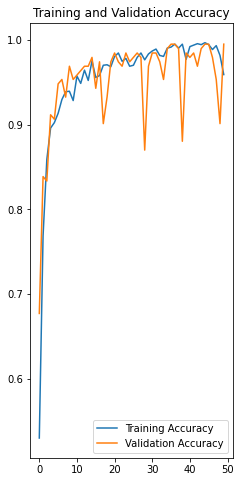

In [40]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(Epochs),acc,label='Training Accuracy')
plt.plot(range(Epochs),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation Losses')

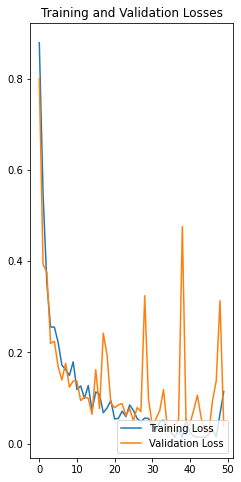

In [41]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(Epochs),losses,label='Training Loss')
plt.plot(range(Epochs),val_loss,label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Losses')

Actual Image Potato___Late_blight
1/1 [==============================] - 1s 879ms/step
Predicted Label: Potato___Late_blight


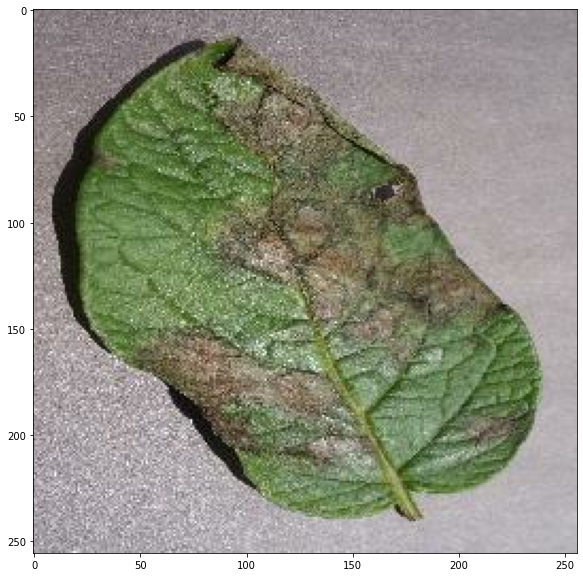

In [48]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in test_ds.take(1):
  first_image = image_batch[0].numpy().astype('uint8')
  first_label = label_batch[0].numpy()
  plt.imshow(first_image)
  print('Actual Image',class_names[first_label])
  Batch_Prediction = model.predict(image_batch)
  print('Predicted Label:',class_names[np.argmax(Batch_Prediction[0])])

In [ ]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in test_ds.take(1):
  first_image = image_batch[0].numpy().astype('uint8')
  first_label = label_batch[0].numpy()
  plt.imshow(first_image)
  print('Actual Image',class_names[first_label])
  Batch_Prediction = model.predict(image_batch)
  print('Predicted Label:',class_names[np.argmax(Batch_Prediction[0])])

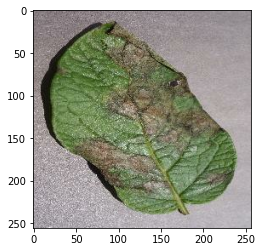

In [74]:
first_image = image_batch[0].numpy().astype('uint8')
plt.imshow(first_image)

In [101]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 63ms/step


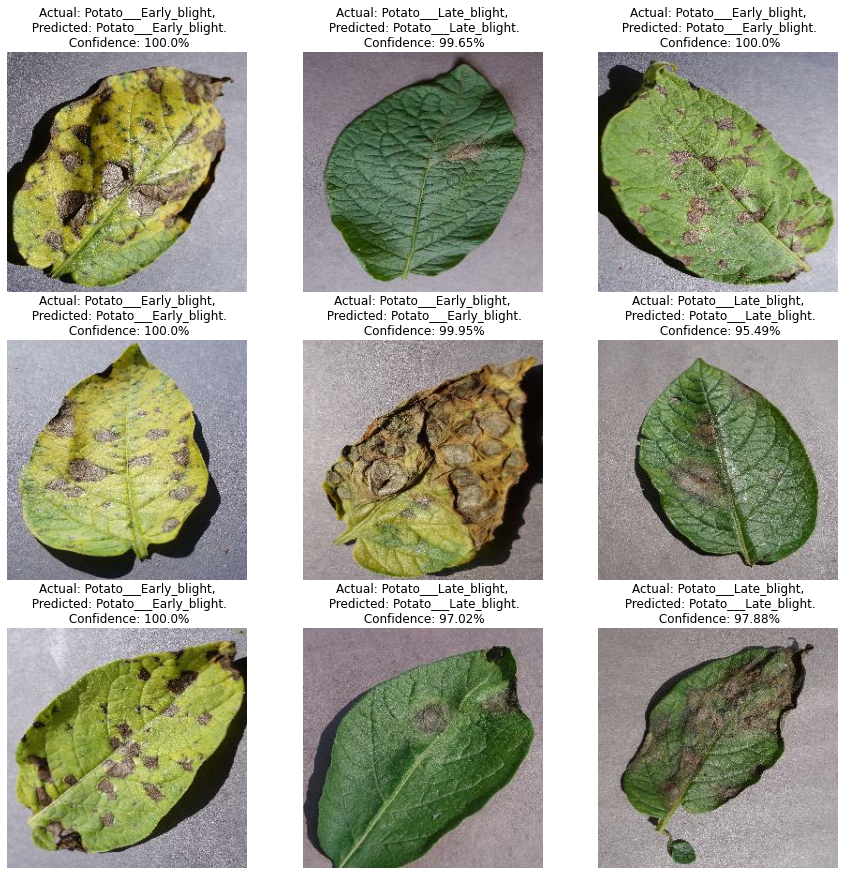

In [102]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [103]:
!mkdir models

In [107]:
import os
model_version=max([int(i) for i in os.listdir("models") + [0]])+1
model.save(f"models/{model_version}")

In [108]:
model_version

1

In [109]:
model.save("/potatoes.h5")

In [ ]:
/content/models

In [110]:
from google.colab import files
files.download("/content/models")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [112]:
!zip -r /content/models.zip /content/models_To_Zip

	zip warning: name not matched: /content/models_To_Zip

zip error: Nothing to do! (try: zip -r /content/models.zip . -i /content/models_To_Zip)


In [113]:
!zip -r  /content/models.zip  /content/models

  adding: content/models/ (stored 0%)
  adding: content/models/1/ (stored 0%)
  adding: content/models/1/assets/ (stored 0%)
  adding: content/models/1/keras_metadata.pb (deflated 94%)
  adding: content/models/1/saved_model.pb (deflated 90%)
  adding: content/models/1/variables/ (stored 0%)
  adding: content/models/1/variables/variables.index (deflated 68%)
  adding: content/models/1/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/models/1/fingerprint.pb (stored 0%)
